# TREND DI TEMPERATURA NEL CORSO DEL XX SECOLO

Verranno presi in considerazione due modelli climatici (Dataset 1 e Dataset 2) che simulano in funzione di determinati parametri le temperature che si sarebbero dovute registrare secondo i due modelli nel corso del XX secolo.
L'obiettivo è verificare se alcuni effetti che sono stati effettivamente osservati nel corso del secolo scorso, vengono effettivamente inclusi e simulati in maniera più o meno evidente dai modelli presi in esame.


# Constraints for the exercise:
•2 different datasets (e.g. model and observations, n different models, 2 different observational datasets, etc.)

•Perform at least 1 operation in space and 1 operation in time (e.g. aggregation, normalization, resampling, regridding etc.)

•Display data both as function of space and time (time series and maps)

•Use some sort of statistical analysis on the data (arrange the data according to some pdf, hypothesis testing, time series analysis, detection of trends, etc.)

In [1]:
# apro i due dataset che verranno confrontati e importo librerie

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import xarray as xr

# apro primo dataset e lo rinomino ds1

d1='./ts_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc'
ds1= xr.open_dataset(d1)
print(ds1)

# apro secondo dataset e lo rinomino ds2

d2='./ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'
ds2= xr.open_dataset(d2)

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    ts         (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float32 ...
    lon_bnds   (lon, nbnd) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T21:40:35Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella


/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:401: SerializationWarning: variable 'ts' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


# Le anomalie di temperatura sono più accentuate alle latitudini elevate, lontane dall’equatore 

# Primo modello

Vediamo quanto accade nell'emisfero boreale per il primo modello

In [2]:
# conversione da gradi Kelvin a gradi Celsius
mts1 = ds1.ts - 273.15
mts2 = ds2.ts - 273.15

# estraggo anomalie di temperatura nella fascia 45-90 gradi per dataset 1
# ( cioè nella fascia di latitudine superiore ai 45 gradi a nord dell'equatore 
# nell'emisfero boreale);
# inoltre estraggo anche il periodo di interesse ( XX secolo)

for i in range(0,360):
    for j in range(45,90):
        lon_st = i 
        lat_st = j
        mts1_st = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        mts1_st=mts1_st.sel(time=slice("1901-01", "2000-12"))
        #print (mts1_st)

In [3]:
# anomalie di temperatura nel XX secolo per il periodo 

# aggrego valori calcolando le medie annuali per ogni stazione
mts1bor=mts1_st.coarsen(time=12).mean()
anom_bor1=mts1bor-mts1bor.mean(dim='time')
anom_bor1

# ottengo le anomalie annuali medie per la fascia di interesse

<xarray.DataArray (time: 100)>
array([-2.508511,  1.386537, -0.757679, -2.08337 , -2.253315, -1.230265,
       -0.728058, -2.097771,  0.538898, -0.785429, -1.47464 , -2.071051,
       -1.426023, -1.895931, -1.622652, -1.90341 , -1.23888 , -0.478804,
       -1.182478, -0.216135, -0.37705 , -0.487143,  0.361137,  0.221263,
       -1.194399,  0.056558, -0.228046,  0.873589, -0.172562, -0.373972,
       -0.424383, -0.966101,  0.858009, -0.266342, -0.285189,  0.406177,
        0.942832,  0.752393, -1.999924, -0.918158, -1.563606,  0.394188,
       -0.317015,  0.157211, -0.716871,  0.407264, -1.947693, -0.678488,
        0.635017, -0.730482, -0.621382,  0.597916,  0.306151, -1.448477,
        0.312816,  0.443997, -0.23979 , -0.113139,  0.898129,  0.117641,
        1.532444,  0.981716, -0.421444,  0.664837,  1.550988, -0.948801,
       -0.736637, -0.549543, -2.266848, -0.693476,  0.767948,  0.785301,
        0.365293,  2.326843, -0.068996, -0.051495,  1.404876,  0.307143,
        1.315574,  0

Confronto le anomalie invece simulate nella fascia equatoriale sottostante:

In [4]:
# estraggo anomalie di temperatura nella fascia 0-45 gradi per dataset 1;
# nel periodo di interesse ( XX secolo)

for i in range(0,360):
    for j in range(0,45):
        lon_st = i 
        lat_st = j
        mts_eqbor = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        mts_eqbor=mts_eqbor.sel(time=slice("1901-01", "2000-12"))
 

In [5]:
# anomalie di temperatura nel XX secolo per la fascia equatoriale nord 
# in rapporto alla media del periodo

mts1eq=mts_eqbor.coarsen(time=12).mean()
anom_eqbor1=mts1eq-mts1eq.mean(dim='time')
anom_eqbor1

<xarray.DataArray (time: 100)>
array([-3.045177e-01, -9.391584e-01, -9.229918e-01,  3.657990e-01,
       -3.860703e-01,  3.219223e-01, -1.542645e-01,  2.126617e-01,
        6.255312e-01,  2.944183e-01,  1.165130e+00, -1.378994e-01,
        8.381844e-02,  1.916218e-02,  9.395599e-02, -5.943737e-01,
       -1.347942e-01, -1.157150e-01,  5.886812e-01, -1.551628e-03,
       -4.356384e-03, -5.888367e-02,  3.989992e-01, -7.045193e-01,
       -8.675957e-02, -1.703444e-01,  2.879562e-01,  8.960791e-01,
       -1.215973e-01, -1.587601e-01,  7.766924e-01, -2.681990e-01,
        2.006731e-01,  3.198442e-01,  8.305845e-01,  3.627748e-01,
        8.235579e-01, -3.178215e-02, -3.293686e-01,  4.018097e-01,
        7.926178e-02, -2.204895e-01, -2.143326e-01,  4.493656e-01,
       -1.090527e-01,  5.686264e-01, -7.409191e-02,  2.739229e-01,
       -1.232176e-01, -9.169922e-01,  8.442831e-01,  2.971649e-01,
        1.659470e-01,  2.288208e-01,  1.134205e-01, -6.838036e-02,
       -3.919630e-01, -2.914839

Confronto graficamente quanto avvenuto nella fascia 45-90 con quanto avvenuto nella fascia 0-45:

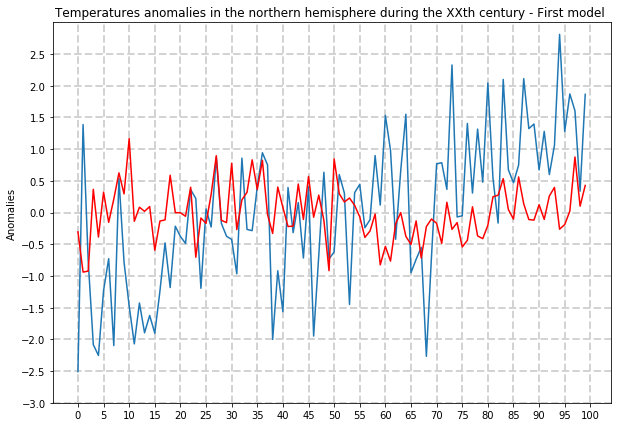

In [6]:
# il trend è particolarmente evidente negli ultimi anni
fig = plt.figure(figsize=(10,7))
plt.plot(anom_bor1)
plt.title('Temperatures anomalies in the northern hemisphere during the XXth century - First model ')
plt.ylabel('Anomalies')
plt.ylim((-3,3))
plt.plot(anom_eqbor1, color='red')
ax = fig.gca()
ax.set_xticks(np.arange(0, 105, 5))
ax.set_yticks(np.arange(-3, 3, 0.5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('A1-A.jpg')

# è particolarmente evidente come le anomalie raccolte ad elevate latitudini presentino
# valori più accentuati rispetto ai valori raccolti nell'emisfero boreale vicino all'equatore;
# è evidente il trend in aumento delle temperature, mentre i valori di anomalie sotto media
# riscontrati ad inizio secolo dipendono dal fatto che le anomalie sono state calcolate dalla 
# media del periodo nella zona e non su un periodo più ampio  

Vediamo quanto avviene nell'emisfero Australe:

In [16]:
# estraggo anomalie di temperatura nella fascia 45-90 gradi sud per dataset 1, cioè nella 
# fascia di latitudine inferiore ai 45 gradi a sud dell'equatore nell'emisfero australe per il XX secolo

for i in range(0,360):
    for j in range(-90,-45):
        lon_st = i 
        lat_st = j
        mts1_st2 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest') 
        mts1_st2 = mts1_st2.sel(time=slice("1901-01", "2000-12"))
        #print (mts1_st)

# anomalie di temperatura nel XX secolo per il periodo, 
# aggrego valori calcolando le medie annuali per ogni stazione

mts1aus=mts1_st2.coarsen(time=12).mean()
anom_aus1=mts1aus-mts1aus.mean(dim='time')
anom_aus1

<xarray.DataArray (time: 100)>
array([-0.202208, -0.158586, -0.238111, -0.09785 , -0.18307 , -0.057432,
        0.482988, -0.055387,  0.342257,  0.079396, -0.192576, -0.012739,
        0.523897,  0.329981, -0.004827, -0.132594, -0.199311, -0.472306,
       -0.551463, -0.251178, -0.098977, -0.265985,  0.100867, -0.346533,
       -0.524697, -0.154422,  1.003446, -0.059091, -0.223109, -0.612455,
        0.565635,  0.263328,  0.307161, -0.190181, -0.228984, -0.025508,
        0.255332, -0.053058,  0.074381, -0.375998, -0.062773, -0.070539,
       -0.195562, -0.106578,  0.018882, -0.378907,  0.220021,  0.266829,
        0.392588,  0.031356,  0.074094, -0.128541, -0.442653,  0.158246,
       -0.122847,  0.041422, -0.338206,  0.115033, -0.393756,  0.048314,
        0.09749 , -0.042436, -0.156528, -0.713016, -0.540103, -0.188769,
        0.27054 , -0.264087,  0.207831, -0.097657,  0.116289, -0.181293,
        0.440038,  0.328132,  0.269164, -0.140809, -0.125667,  0.007787,
       -0.218705, -0

In [17]:
# confronto con quanto avvenuto nella fascia equatoriale soprastante, estraggo anomalie
# nella fascia -45,0 gradi per dataset 1 per il periodo di interesse ( XX secolo)

for i in range(0,360):
    for j in range(-45,0):
        lon_st = i 
        lat_st = j
        mts_eqaus = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        mts_eqaus=mts_eqaus.sel(time=slice("1901-01", "2000-12"))

In [18]:
# anomalie di temperatura nel XX secolo per la fascia equatoriale nord in rapporto alla media del periodo

mts1eq2=mts_eqaus.coarsen(time=12).mean()
anom_eqaus1=mts1eq2-mts1eq2.mean(dim='time')
anom_eqaus1 

<xarray.DataArray (time: 100)>
array([-0.337399, -0.478083, -0.571003, -0.524454, -0.478064, -0.172415,
       -0.383825,  0.350574, -0.318903, -0.012735,  0.333994, -0.187826,
       -0.384724,  0.230814, -0.523542, -0.893436,  0.012197, -0.439501,
       -0.241423, -0.276354, -0.268841, -0.192495,  0.084803,  0.109356,
        0.437183,  0.085316, -0.751894, -0.549517,  0.164377,  0.185431,
       -0.099874, -0.468281, -0.512251, -0.19544 ,  0.115231,  0.484493,
        0.083118, -0.045103, -0.435389,  0.232584, -0.220079,  0.057543,
        0.204737,  0.004793,  0.026285,  0.788851,  0.05331 , -0.591938,
       -0.285711,  0.282526, -0.167582,  0.375187,  0.683676,  0.057833,
        0.116291,  0.401264,  0.254755, -0.230692,  0.325758,  0.239573,
       -0.063314,  0.148563, -0.485966, -0.083864, -0.357126, -0.385065,
        0.059071,  0.144833, -0.013147, -0.267477, -0.00329 ,  0.593929,
        0.38003 , -0.230442,  0.280394,  0.224993,  0.150784, -0.166216,
        0.245886,  0

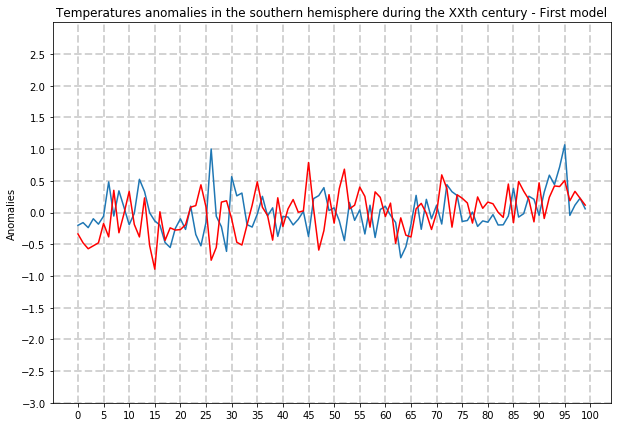

In [139]:
# Confronto tra quanto avvenuto nella fascia (-90;-45) con quanto avvenuto nella fascia (-45;0)
# il trend è visibile negli ultimi anni;

fig = plt.figure(figsize=(10,7))
ax = fig.gca()
plt.plot(anom_aus1)
plt.ylabel('Anomalies')
plt.ylim((-3,3))
plt.plot(anom_eqaus1, color='red')
plt.title('Temperatures anomalies in the southern hemisphere during the XXth century - First model')
ax.set_xticks(np.arange(0, 105, 5))
ax.set_yticks(np.arange(-3, 3, 0.5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('A1-B.jpg')

Nella fascia equatoriale la differenza risulta molto meno marcata. Nel complesso, il primo dataset simula correttamente ciò che è stato 
realmente osservato nel corso del XX secolo per quanto riguarda le differenze di latitudine. Consideriamo ora il secondo modello:

# Secondo modello

Vediamo quanto accade nell'emisfero boreale per il primo modello

Emisfero australe

In [7]:
# estraggo anomalie di temperatura nella fascia 45-90 gradi per dataset 2
# ( cioè nella fascia di latitudine superiore ai 45 gradi a 
# nord dell'equatore nell'emisfero boreale) per il periodo di interesse (XX secolo)

for i in range(0,360):
    for j in range(45,90):
        lon_st = i 
        lat_st = j
        mtsbor2_st = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        mtsbor2_st=mtsbor2_st.sel(time=slice("1901-01", "2000-12"))
        #print (mts2_st)
        
# anomalie di temperatura emisfero australe
mts_bor2=mtsbor2_st.coarsen(time=12).mean()
anom_bor2=mts_bor2-mts_bor2.mean(dim='time')
#anom_bor2

In [8]:
# confronto con quanto avvenuto nella fascia equatoriale sottostante

for i in range(0,360):
    for j in range(0,45):
        lon_st = i 
        lat_st = j
        mts_eqbor2 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        mts_eqbor2=mts_eqbor2.sel(time=slice("1901-01", "2000-12"))
        #print(mts_eqbor2)

        
mts_eqbor2=mts_eqbor2.coarsen(time=12).mean()
anom_eqbor2=mts_eqbor2-mts_eqbor2.mean(dim='time')
#anom_eqbor2

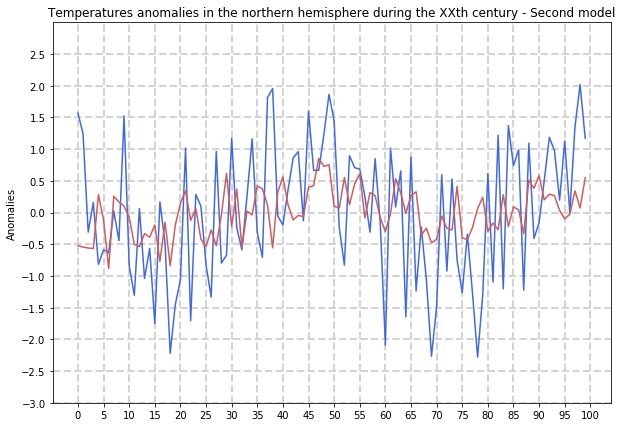

In [9]:
# confronto anomalie di temperatura emisfero boreale 

fig = plt.figure(figsize=(10,7))
plt.plot(anom_bor2, color='royalblue')
plt.ylabel('Anomalies')
plt.ylim((-3,3))
plt.plot(anom_eqbor2, color='indianred')
ax = fig.gca()
plt.title('Temperatures anomalies in the northern hemisphere during the XXth century - Second model')
ax.set_xticks(np.arange(0, 105, 5))
ax.set_yticks(np.arange(-3, 3, 0.5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('A1-C.jpg')

La differenza è marcata come avvenuto per il primo modello.

In [25]:
# estraggo anomalie di temperatura nella fascia (-90;-45) gradi per modello 2
# ( cioè nella fascia di latitudine inferiore ai 45 gradi a 
# sud dell'equatore nell'emisfero australe) per il periodo di interesse (XX secolo)

for i in range(0,360):
    for j in range(-90,-45):
        lon_st = i 
        lat_st = j
        mts2_st2 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest') 
        mts2_st2=mts2_st2.sel(time=slice("1901-01", "2000-12"))
        #print (mts2_st2)

        
# anomalie di temperatura nel XX secolo per il periodo,
# aggrego valori calcolando le medie annuali per ogni stazione

mts2st2=mts2_st2.coarsen(time=12).mean()
anom_aus2=mts2st2-mts2st2.mean(dim='time')
# anom_aus2

In [26]:
# confronto con quanto avvenuto nella fascia equatoriale soprastante;
# estraggo anomalie di temperatura nella fascia -45,0 gradi per dataset 2
# per il periodo di interesse ( XX secolo)

for i in range(0,360):
    for j in range(-45,0):
        lon_st = i 
        lat_st = j
        mts_eqaus = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        mts_eqaus=mts_eqaus.sel(time=slice("1901-01", "2000-12"))

# anomalie di temperatura nel XX secolo per la fascia equatoriale nord in rapporto alla media del periodo

mts_eqaus2=mts_eqaus.coarsen(time=12).mean()
anom_eqaus2=mts_eqaus2-mts_eqaus2.mean(dim='time')

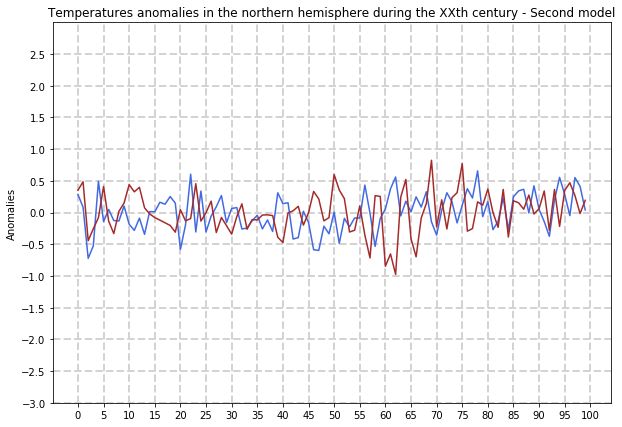

In [144]:
# Confronto tra quanto avvenuto nella fascia (-90;-45) con quanto avvenuto nella fascia (-45;0)
# il trend è visibile negli ultimi anni;

fig = plt.figure(figsize=(10,7))
plt.plot(anom_aus2,color='royalblue')
plt.ylabel('Anomalies')
plt.ylim((-3,3))
plt.plot(anom_eqaus2, color='brown')
ax = fig.gca()
plt.title('Temperatures anomalies in the northern hemisphere during the XXth century - Second model')
ax.set_xticks(np.arange(0, 105, 5))
ax.set_yticks(np.arange(-3, 3, 0.5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('A1-D.jpg')

I risultati del secondo modello ricalcano quanto osservato col modello 1: nell'emisfero boreale le anomalie ad elevate latitudini rispetto alle medie latitudini sono accentuate, mentre la differenza risulta meno marcata nell'emisfero australe. 

Visualizziamo nel complesso le anomalie. Nei grafici sottostanti sono riportate le anomalie medie nel corso del XX secolo calcolate a partire dalla media globale nel periodo di ciascuna zona di rilevazione

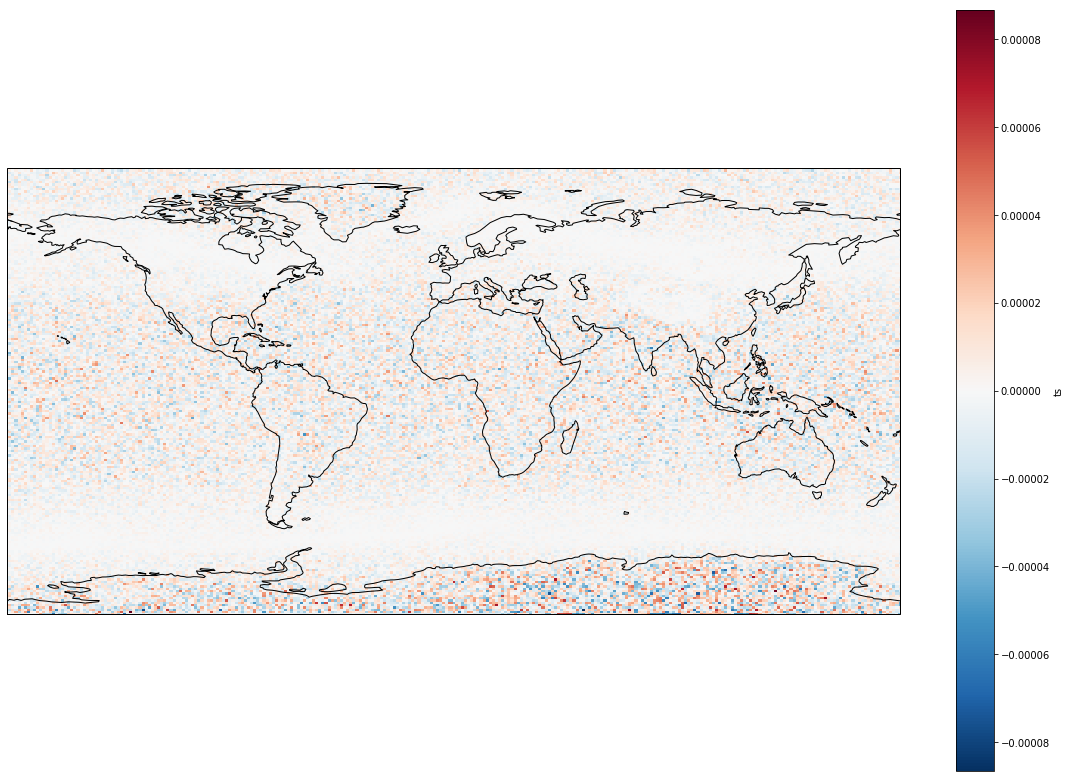

In [10]:
fig = plt.figure(figsize=(20,14))
subplots = (1,1)
n_panels = subplots[0] * subplots[1]
ax = fig.add_subplot(subplots[0], subplots[1], 1, projection=ccrs.PlateCarree())
ax.coastlines() 

mts_st1= mts1.sel(lat=slice(-90,90), lon=slice(0,360)) # area di interesse: tutto
mts_st_y1 = mts_st1.sel(time=slice("1901-01", "2000-12")) # periodo di interesse

mts_anom1 = mts_st_y1 - mts_st_y1.mean(dim='time')
mts_anom1 = mts_anom1.mean(dim='time')

mts_anom1.plot()
plt.savefig('A1-E.jpg')

La situazione a livello puntuale per ogni punto di rilevazione considerato, racconta una realtà molto più eterogenea. In questo caso è molto più complesso trarre evidenze, se non che le anomalie di temperatura più marcate si riscontrano nella zona antartica, sia per il modello 1 che per il modello 2.

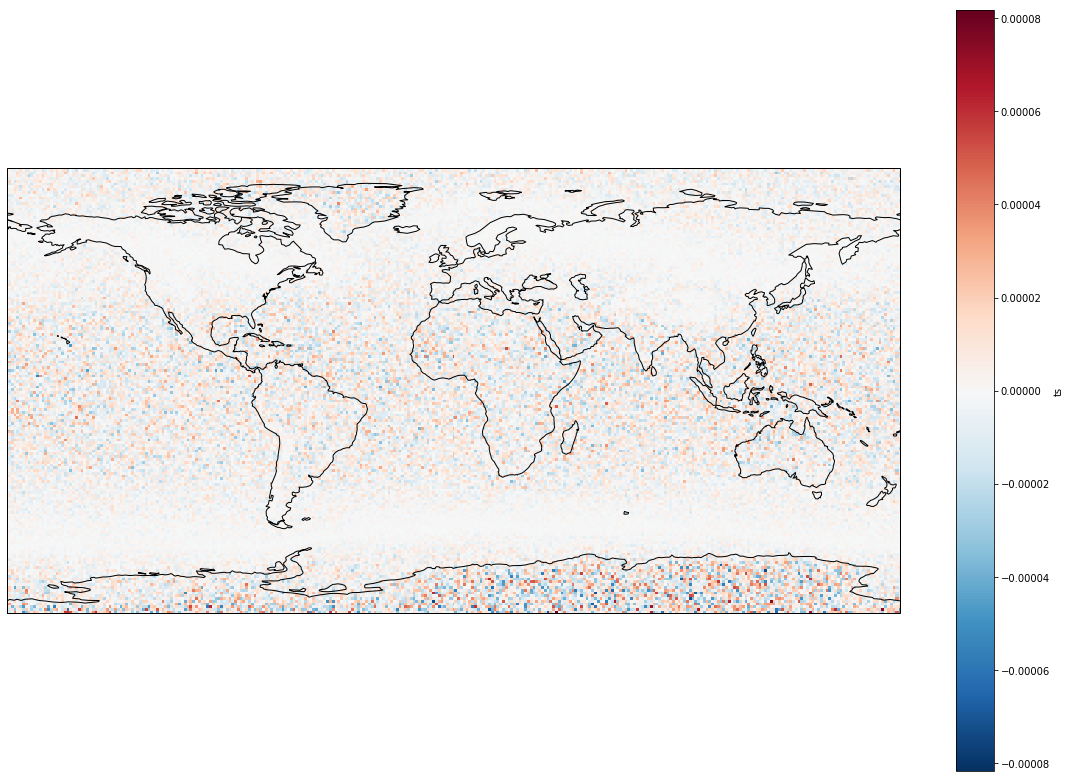

In [11]:
fig = plt.figure(figsize=(20,14))
subplots = (1,1)
n_panels = subplots[0] * subplots[1]
ax = fig.add_subplot(subplots[0], subplots[1], 1, projection=ccrs.PlateCarree())
ax.coastlines() 

mts_st2= mts2.sel(lat=slice(-90,90), lon=slice(0,360)) # area di interesse: tutto
mts_st_y2 = mts_st2.sel(time=slice("1901-01", "2000-12")) # periodo di interesse

mts_anom2 = mts_st_y2 - mts_st_y2.mean(dim='time')
mts_anom2 = mts_anom2.mean(dim='time')


mts_anom2.plot()
plt.savefig('A1-F.jpg')

La situazione risulta abbastanza eterogenea pressochè ovunque; si possono trarre evidenze comunque per l'Antartide dove le anomalie medie sono più marcate.

# Il surriscaldamento è più accentuato sulla terraferma che sui mari

Prendiamo un campione di osservazioni simulate provenienti da una stazione marina e un campione proveniente da stazioni sulla terraferma (di uguale numerosità)

calcolo anomalie di temperatura per il periodo 1900-2000 
rispetto alla media del periodo per il sottoinsieme zone marine e zone terrestri:

MODELLO 1

In [12]:
mts1 = ds1.ts - 273.15
mts2 = ds2.ts - 273.15

# terra
for i in range(0,120):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        terra_bor1 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        terra_bor1=terra_bor1.sel(time=slice("1901-01", "2000-12"))
        
media_terrabor1=terra_bor1.coarsen(time=12).mean()
anom_terrabor1=media_terrabor1-media_terrabor1.mean(dim='time')

# mare
for i in range(-70,-20):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        mare_bor1 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        mare_bor1=mare_bor1.sel(time=slice("1901-01", "2000-12"))
        
media_marebor1=mare_bor1.coarsen(time=12).mean()
anom_marebor1=media_marebor1-media_marebor1.mean(dim='time')

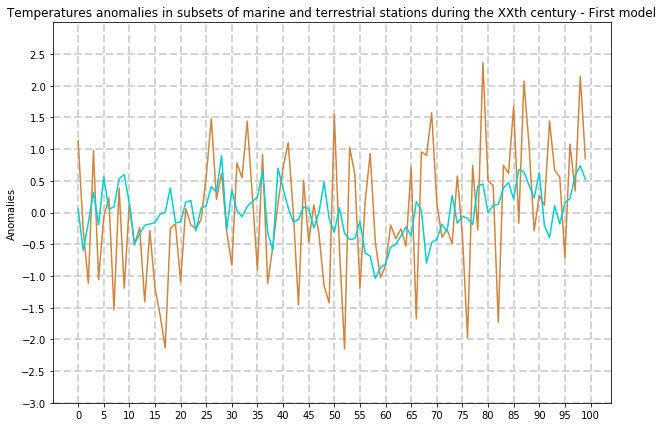

In [13]:
# confronto grafico anomalie mare e terra:
fig = plt.figure(figsize=(10,7))
plt.plot(anom_terrabor1, color='peru')
plt.ylabel('Anomalies')
plt.ylim((-3,3))
plt.plot(anom_marebor1, color='darkturquoise')

ax = fig.gca()
plt.title('Temperatures anomalies in subsets of marine and terrestrial stations during the XXth century - First model')
ax.set_xticks(np.arange(0, 105, 5))
ax.set_yticks(np.arange(-3, 3, 0.5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('B1-A.jpg')

Appare evidente come le anomalie siano più accentuate sulla terra.
Per focalizzarsi meglio sul surriscaldamento negli ultimi anni (periodo 1950-2000) calcolo le anomalie a partire dalla media sul periodo 1900-1950 delle medesime stazioni

In [14]:
# calcolo le anomalie di temperatura per il cinquantennio 1950-2000 a partire dalla media 
# del cinquantennio 1900-1950 per la selezione di stazione sulla terra

for i in range(0,120):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        terra_bor_alt1 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        terra_bor_alt1 = terra_bor_alt1.sel(time=slice("1901-01", "1950-12"))

for i in range(0,120):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        terra_bor_alt2 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        terra_bor_alt2 = terra_bor_alt2.sel(time=slice("1951-01", "2000-12"))

media_terrabor_alt1=terra_bor_alt1.coarsen(time=12).mean()
media_terrabor_alt2=terra_bor_alt2.coarsen(time=12).mean()
anom_terrabor1=media_terrabor_alt2-media_terrabor_alt1.mean(dim='time')

In [15]:
# faccio lo stesso per le osservazioni marine rispetto al periodo precedente

for i in range(-70,-20):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        mare_bor_alt1 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        mare_bor_alt1 = mare_bor_alt1.sel(time=slice("1901-01", "1950-12"))

for i in range(-70,-20):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        mare_bor_alt2 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        mare_bor_alt2=mare_bor_alt2.sel(time=slice("1951-01", "2000-12"))

media_marebor_alt1=mare_bor_alt1.coarsen(time=12).mean()
media_marebor_alt2=mare_bor_alt2.coarsen(time=12).mean()
anom_marebor1=media_marebor_alt2-media_marebor_alt1.mean(dim='time')

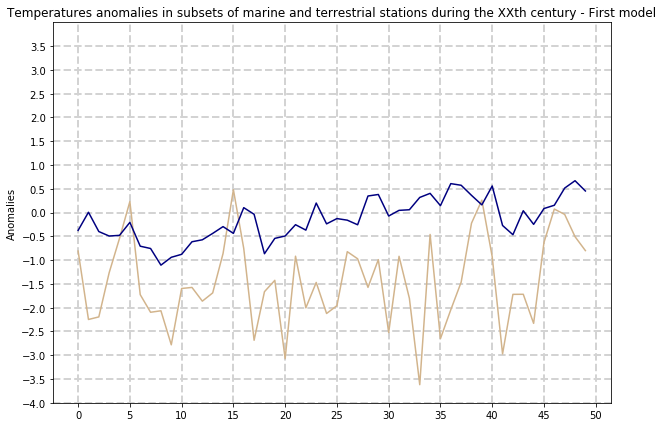

In [16]:
fig = plt.figure(figsize=(10,7))
plt.plot(anom_terrabor1, color='tan')
plt.ylabel('Anomalies')
plt.plot(anom_marebor1, color='navy')
plt.ylim((-4,4))

ax = fig.gca()
plt.title('Temperatures anomalies in subsets of marine and terrestrial stations during the XXth century - First model')
ax.set_xticks(np.arange(0, 55, 5))
ax.set_yticks(np.arange(-4, 4, 0.5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('B1-B.jpg')

Per il primo modello, viene registrato un raffreddamento anomalo se le anomalie vengono calcolate a partire dalla media del periodo precedente. Questa osservazione delle simulazioni del modello è in controtendenza con quanto realmente osservato.

MODELLO 2

In [17]:
# osservazioni terra 
for i in range(0,120):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        terra_bor2 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        terra_bor2=terra_bor2.sel(time=slice("1901-01", "2000-12"))
        
media_terrabor2=terra_bor2.coarsen(time=12).mean()
anom_terrabor2=media_terrabor2-media_terrabor2.mean(dim='time')

# osservazioni mare
for i in range(-70,-20):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        mare_bor2 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        mare_bor2=mare_bor2.sel(time=slice("1901-01", "2000-12"))
        
media_marebor2=mare_bor2.coarsen(time=12).mean()
anom_marebor2=media_marebor2-media_marebor2.mean(dim='time')

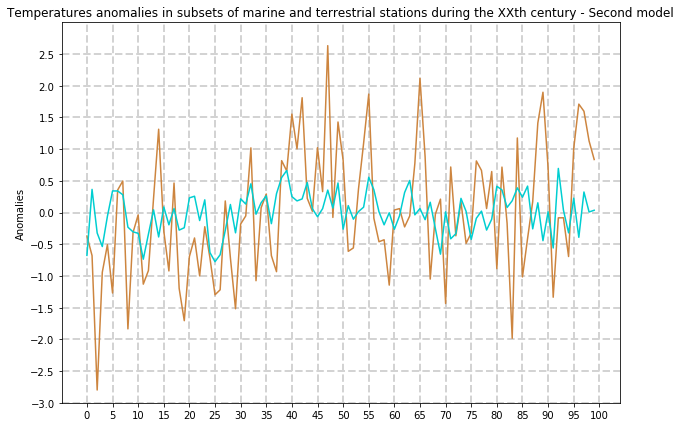

In [18]:
# confronto grafico anomalie mare e terra calcolate rispetto alla media dell'intero periodo
fig = plt.figure(figsize=(10,7))
plt.plot(anom_terrabor2, color='peru')
plt.ylabel('Anomalies')
plt.ylim((-3,3))
plt.plot(anom_marebor2, color='darkturquoise')

ax = fig.gca()
plt.title('Temperatures anomalies in subsets of marine and terrestrial stations during the XXth century - Second model')
ax.set_xticks(np.arange(0, 105, 5))
ax.set_yticks(np.arange(-3, 3, 0.5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('B2-A.jpg')

Le misurazioni a livello del mare hanno varianza minore e sono decisamente più costanti. 
Di nuovo, per focalizzarsi meglio sul surriscaldamento negli ultimi anni (periodo 1950-2000) calcolo le anomalie a partire dalla media sul periodo 1900-1950 delle medesime stazioni

In [19]:
for i in range(0,120):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        terra_bor_alt3 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        terra_bor_alt3=terra_bor_alt3.sel(time=slice("1901-01", "1950-12"))

for i in range(0,120):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        terra_bor_alt4 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        terra_bor_alt4=terra_bor_alt4.sel(time=slice("1951-01", "2000-12"))

media_terrabor_alt3=terra_bor_alt3.coarsen(time=12).mean()
media_terrabor_alt4=terra_bor_alt4.coarsen(time=12).mean()
anom_terrabor3=media_terrabor_alt4-media_terrabor_alt3.mean(dim='time')

In [20]:
# faccio lo stesso per le osservazioni marine rispetto al periodo precedente

for i in range(-70,-20):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        mare_bor_alt3 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        mare_bor_alt3=mare_bor_alt3.sel(time=slice("1901-01", "1950-12"))

for i in range(-70,-20):
    for j in range(22,60):
        lon_st = i 
        lat_st = j
        mare_bor_alt4 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        mare_bor_alt4=mare_bor_alt4.sel(time=slice("1951-01", "2000-12"))

media_marebor_alt3=mare_bor_alt3.coarsen(time=12).mean()
media_marebor_alt4=mare_bor_alt4.coarsen(time=12).mean()
anom_marebor3=media_marebor_alt4-media_marebor_alt3.mean(dim='time')

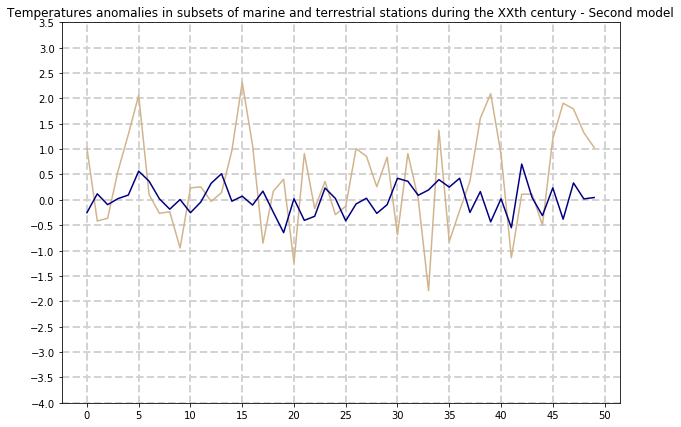

In [22]:
fig = plt.figure(figsize=(10,7))
plt.plot(anom_terrabor3, color='tan')
plt.plot(anom_marebor3, color='navy')
plt.ylim((-3,3))
#plt.legend()
ax = fig.gca()
plt.title('Temperatures anomalies in subsets of marine and terrestrial stations during the XXth century - Second model')
ax.set_xticks(np.arange(0, 55, 5))
ax.set_yticks(np.arange(-4, 4, 0.5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('B2-B.jpg')


E' evidente per il secondo modello che, se si calcolano le anomalie a partire dalla media del periodo precedente, il riscaldamento (anomalie positive) è più marcato sulla terraferma, presentando numerosi picchi a distanza considerevolmente maggiore rispetto allo zero.
L'andamento delle temperature simulate sugli oceani invece mantiene un 'bilancio in equilibrio' anche calcolando le anomalie a partire dalla media del cinquantennio precedente.
Queste simulazioni appaiono più in linea con quanto osservato realmente.

# L'emisfero boreale è soggetto a riscaldamento, quello australe (in particolare l’Antartide) a lieve raffreddamento, con anomalie di temperatura più accentuate

In [23]:
# controlliamo il trend complessivo dell'emisfero australe nell'ultimo periodo;
# (serie storica del ventesimo secolo per il primo modello)

for i in range(0,360):
    for j in range(-90,0):
        lon_st = i 
        lat_st = j
        aus1 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        aus1 = aus1.sel(time=slice("1901-01", "2000-12"))

aus_em1=aus1.coarsen(time=12).mean()
anom_aus_em1=aus_em1-aus_em1.mean(dim='time')

anom_aus_em1

<xarray.DataArray (time: 100)>
array([-0.337399, -0.478083, -0.571003, -0.524454, -0.478064, -0.172415,
       -0.383825,  0.350574, -0.318903, -0.012735,  0.333994, -0.187826,
       -0.384724,  0.230814, -0.523542, -0.893436,  0.012197, -0.439501,
       -0.241423, -0.276354, -0.268841, -0.192495,  0.084803,  0.109356,
        0.437183,  0.085316, -0.751894, -0.549517,  0.164377,  0.185431,
       -0.099874, -0.468281, -0.512251, -0.19544 ,  0.115231,  0.484493,
        0.083118, -0.045103, -0.435389,  0.232584, -0.220079,  0.057543,
        0.204737,  0.004793,  0.026285,  0.788851,  0.05331 , -0.591938,
       -0.285711,  0.282526, -0.167582,  0.375187,  0.683676,  0.057833,
        0.116291,  0.401264,  0.254755, -0.230692,  0.325758,  0.239573,
       -0.063314,  0.148563, -0.485966, -0.083864, -0.357126, -0.385065,
        0.059071,  0.144833, -0.013147, -0.267477, -0.00329 ,  0.593929,
        0.38003 , -0.230442,  0.280394,  0.224993,  0.150784, -0.166216,
        0.245886,  0

In [24]:
# controlliamo quanto accaduto in particolare in Antartide; 
# anomalie in Antartide nel ventesimo secolo per il primo modello

for i in range(0,360):
    for j in range(-90,-60):
        lon_st = i 
        lat_st = j
        antartide1 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        antartide1=antartide1.sel(time=slice("1901-01", "2000-12"))
        

ant1=antartide1.coarsen(time=12).mean()
anom_ant1=ant1-ant1.mean(dim='time')

anom_ant1

<xarray.DataArray (time: 100)>
array([-1.533218e+00,  5.086012e-01, -5.647225e-01,  3.323927e-01,
       -1.559690e+00,  3.478677e-01,  3.924868e-01, -9.274592e-01,
       -9.876680e-01, -6.184459e-01,  1.892729e-01,  9.260345e-02,
        3.315077e-01,  4.570467e-01, -6.097155e-01, -5.314612e-02,
       -1.556110e-02, -7.792115e-02, -4.123902e-02, -1.026125e+00,
       -1.395234e+00, -1.099841e+00, -3.287807e-01, -1.528493e+00,
       -1.050010e+00, -1.810472e+00,  6.363986e-01,  7.009411e-02,
       -1.271060e+00, -9.639077e-01,  1.344969e+00,  5.271127e-01,
       -4.356914e-01, -6.358142e-01, -1.793251e+00, -1.388911e+00,
        1.554118e+00, -1.346488e+00, -9.217811e-02, -8.599343e-01,
        2.486372e-01,  3.189166e-01,  2.373457e-01, -1.531801e-01,
        9.012506e-01,  1.254550e+00,  5.077035e-01,  2.174227e-01,
        6.107638e-01, -2.203345e-02,  3.878000e-01,  7.557096e-01,
        1.582263e-01, -9.884486e-01, -1.040494e-01, -8.259959e-01,
       -1.262547e+00,  8.104022

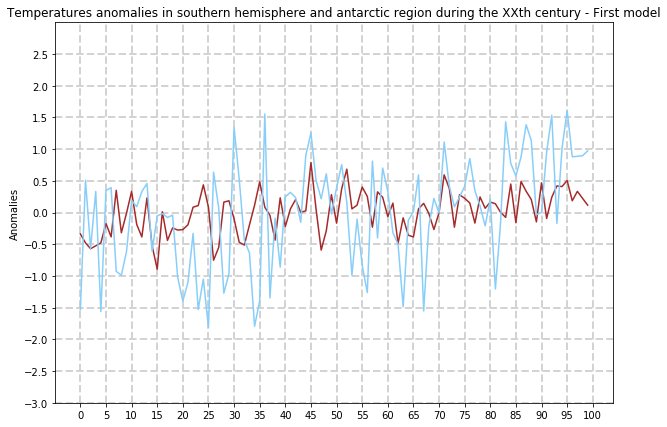

In [25]:
# graficamente vediamo se sono più o meno accentuate: 

fig = plt.figure(figsize=(10,7))
plt.plot(anom_aus_em1, color='brown')
plt.ylabel('Anomalies')
plt.ylim((-3,3))
plt.plot(anom_ant1, color='lightskyblue')


ax = fig.gca()
plt.title('Temperatures anomalies in southern hemisphere and antarctic region during the XXth century - First model')
ax.set_xticks(np.arange(0, 105, 5))
ax.set_yticks(np.arange(-3, 3, 0.5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('C1-A')

Le anomalie sono più accentuate per quanto riguarda l'antartide

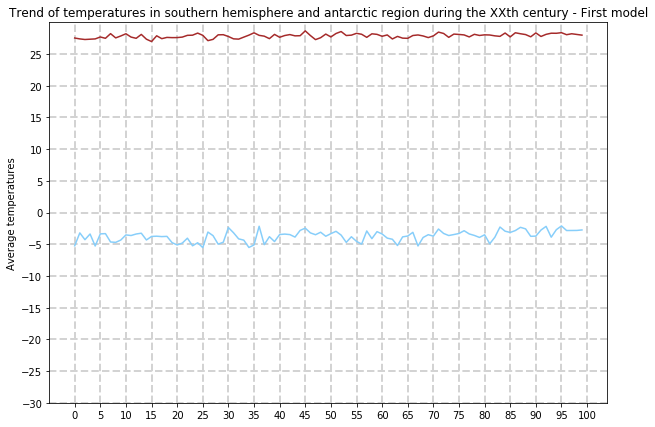

In [35]:
# trend delle temperature medie in Antartide e emisfero australe nel XX secolo:

fig = plt.figure(figsize=(10,7))
plt.plot(aus_em1, color='brown')
plt.ylabel('Average temperatures')
plt.ylim((-30,30))
plt.plot(ant1, color='lightskyblue')

ax = fig.gca()
plt.title('Trend of temperatures in southern hemisphere and antarctic region during the XXth century - First model')
ax.set_xticks(np.arange(0, 105, 5))
ax.set_yticks(np.arange(-30, 30, 5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('C2-A.jpg')

Il grafico sembra mostrato, a differenza di quanto osservato, un trend di lieve ma
costante riscaldamento in Antartide. Le rilevazioni sull'intero emisfero australe invece
mostrano un trend di temperature simulate medie in equilibrio con trend costante.

SECONDO MODELLO 

In [27]:
# controlliamo il trend complessivo dell'emisfero australe nell'ultimo periodo;
# serie storica del ventesimo secolo per il primo modello

for i in range(0,360):
    for j in range(-90,0):
        lon_st = i 
        lat_st = j
        aus2 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        aus2 = aus2.sel(time=slice("1901-01", "2000-12"))

aus_em2=aus2.coarsen(time=12).mean()
anom_aus_em2=aus_em2-aus_em2.mean(dim='time')

anom_aus_em2

<xarray.DataArray (time: 100)>
array([ 3.518925e-01,  4.853210e-01, -4.438190e-01, -2.560520e-01,
       -7.966042e-02,  4.087429e-01, -1.366711e-01, -3.316631e-01,
        1.954651e-02,  1.496582e-01,  4.400730e-01,  3.264256e-01,
        3.983669e-01,  7.467461e-02, -2.154541e-02, -7.981873e-02,
       -1.196747e-01, -1.616955e-01, -2.034378e-01, -3.090839e-01,
        4.373360e-02, -1.314869e-01, -9.413719e-02,  4.547634e-01,
       -1.350384e-01, -1.482010e-03,  1.797104e-01, -3.153839e-01,
       -7.835388e-02, -2.079830e-01, -3.403835e-01, -6.491852e-02,
        1.371613e-01, -2.633972e-01, -1.111813e-01, -1.164398e-01,
       -3.958321e-02, -3.571892e-02, -4.860115e-02, -3.894100e-01,
       -4.734249e-01, -7.682800e-03,  2.828789e-02,  9.824944e-02,
       -1.984081e-01, -4.678726e-03,  3.331814e-01,  2.147961e-01,
       -1.313992e-01, -8.018494e-02,  6.000900e-01,  3.545856e-01,
        2.191219e-01, -3.065701e-01, -2.794132e-01,  1.045227e-01,
       -3.568363e-01, -7.164841

In [28]:
# controlliamo quanto accaduto in particolare in Antartide; 
# anomalie in Antartide nel ventesimo secolo per il secondo modello

for i in range(0,360):
    for j in range(-90,-60):
        lon_st = i 
        lat_st = j
        antartide2 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        antartide2=antartide2.sel(time=slice("1901-01", "2000-12"))
        

ant2=antartide2.coarsen(time=12).mean()
anom_ant2=ant2-ant2.mean(dim='time')

anom_ant2

<xarray.DataArray (time: 100)>
array([-0.017026,  0.297502, -0.534667, -0.573795,  0.017633, -0.006584,
       -0.90188 , -0.432724,  0.115254, -0.938557, -2.011074, -0.265336,
       -0.777565, -0.804817, -0.464247, -1.189571,  0.377936,  0.107749,
        0.309434, -0.267884, -1.073275, -1.240602,  1.100911,  0.047196,
       -1.332239,  0.139812,  1.32726 , -1.028797,  1.420224,  0.00877 ,
        0.657035,  1.281558,  0.800657,  0.405472,  1.264281,  0.562839,
       -0.487956, -1.130712, -0.508473,  1.03511 ,  0.493335,  0.692796,
        0.756291,  0.681847,  1.638089,  0.503936,  0.658581, -0.306999,
       -0.339725,  0.628785,  0.069644, -1.403883,  0.424389, -1.080908,
       -1.364144, -1.218415,  0.76859 ,  0.88861 , -1.039904,  0.413759,
        0.226275,  1.69071 ,  0.098712, -1.507145, -0.690109, -0.446929,
        0.749801,  0.138816, -1.460558,  0.359466,  0.729333, -0.779271,
        0.185847, -0.543303, -1.537145, -2.011487,  0.626912, -0.135501,
        0.387012,  0

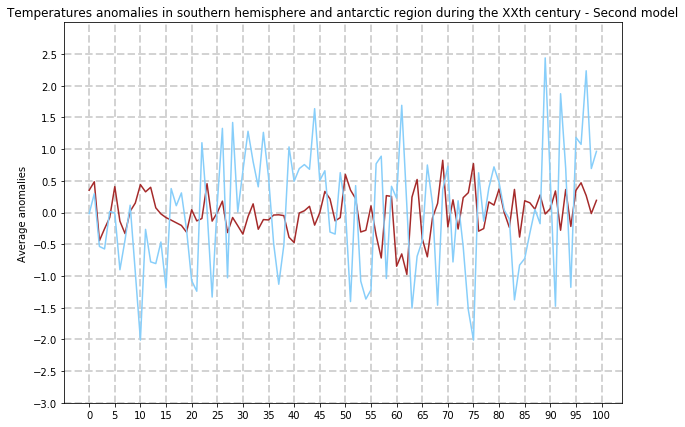

In [31]:
# graficamente vediamo se sono più o meno accentuate: 

fig = plt.figure(figsize=(10,7))
plt.plot(anom_aus_em2, color='brown')
plt.ylabel('Average anomalies')
plt.ylim((-3,3))
plt.plot(anom_ant2, color='lightskyblue')

ax = fig.gca()
plt.title('Temperatures anomalies in southern hemisphere and antarctic region during the XXth century - Second model')
ax.set_xticks(np.arange(0, 105, 5))
ax.set_yticks(np.arange(-3, 3, 0.5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('C1-B.jpg')
#plt.legend()

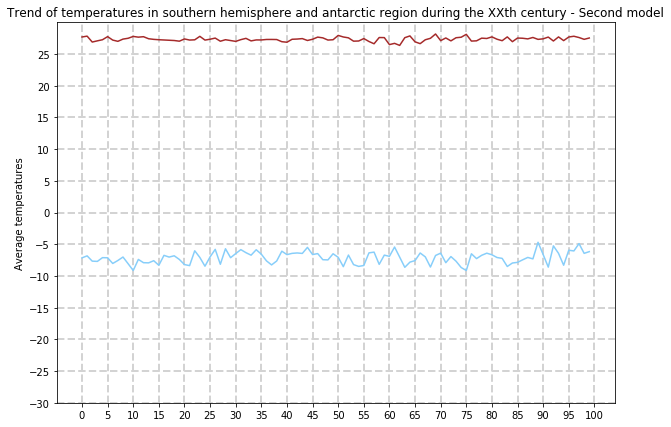

In [34]:
# trend delle temperature medie in Antartide e emisfero australe nel XX secolo:

fig = plt.figure(figsize=(10,7))
plt.plot(aus_em2, color='brown')
plt.ylabel('Average temperatures')
plt.ylim((-10,30))
plt.plot(ant2, color='lightskyblue')

ax = fig.gca()
plt.title('Trend of temperatures in southern hemisphere and antarctic region during the XXth century - Second model')
ax.set_xticks(np.arange(0, 105, 5))
ax.set_yticks(np.arange(-30, 30, 5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('C2-B.jpg')

Le rilevazioni simulate su emisfero australe e Antartide, mostrano un trend di temperature simulate in equilibrio e costante.

# Direzione e forza del trend della temperatura nei due modelli  

MODELLO 1 :
Andamento a livello globale 

Emisfero nord

In [36]:
mts1 = ds1.ts - 273.15
mts2 = ds2.ts - 273.15

for i in range(0,360):
    for j in range(0,60):
        lon_st = i 
        lat_st = j
        bor1 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        bor1=bor1.sel(time=slice("1850-01", "2015-12"))
        
bor1=bor1.coarsen(time=12).mean()


Emisfero sud 

In [37]:
for i in range(0,360):
    for j in range(-60,0):
        lon_st = i 
        lat_st = j
        aus1 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        aus1=aus1.sel(time=slice("1850-01", "2015-12"))
        
aus1=aus1.coarsen(time=12).mean()

# considero 60 gradi di latitudine intorno all'equatore poichè la media australe è spinta 
# eccessivamente verso il basso in maniera irreale dalle osservazioni dell'antartide 

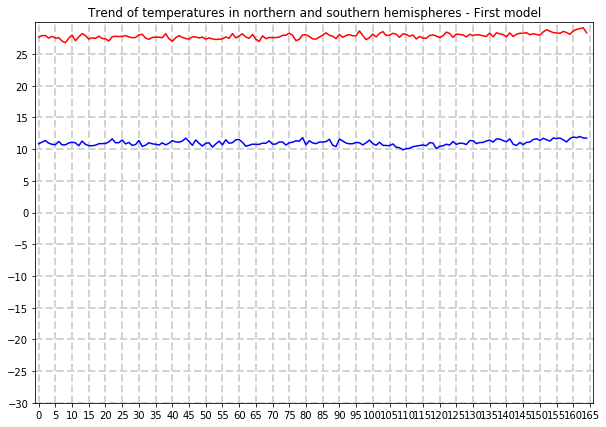

In [56]:
# plot
fig = plt.figure(figsize=(10,7))
plt.plot(bor1, color='blue')
plt.plot(aus1, color='red')
plt.ylim((-10,30))
plt.xlim((-1,166))

ax = fig.gca()
plt.title('Trend of temperatures in northern and southern hemispheres - First model')
ax.set_xticks(np.arange(0, 170, 5))
ax.set_yticks(np.arange(-30, 30, 5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)

Media globale

In [39]:
# allo stesso modo cerco i valori solo della fascia centrale poichè le osservazioni ai poli 
# influenzano in maniera evidente la media in questa fase ed il mio obiettivo
# e la ricerca di un trend

mts1 = ds1.ts - 273.15
mts2 = ds2.ts - 273.15

for i in range(0,360):
    for j in range(-60,60):
        lon_st = i 
        lat_st = j
        glob1 = mts1.sel(lon=lon_st, lat=lat_st, method='nearest')
        glob1=glob1.sel(time=slice("1850-01", "2015-12"))
        
glob1=glob1.coarsen(time=12).mean()

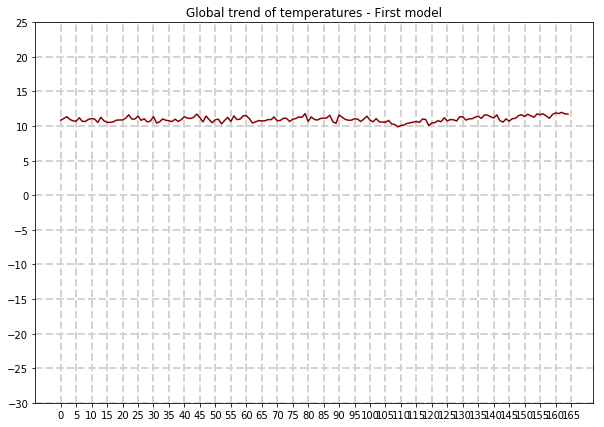

In [57]:
# plot
fig = plt.figure(figsize=(10,7))
plt.plot(glob1, color='darkred') 
plt.ylim((-0,20))

ax = fig.gca()
plt.title('Global trend of temperatures - First model')
ax.set_xticks(np.arange(0, 170, 5))
ax.set_yticks(np.arange(-30, 30, 5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)

MODELLO 2

Emisfero nord

In [41]:
for i in range(0,360):
    for j in range(0,60):
        lon_st = i 
        lat_st = j
        bor2 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        bor2=bor2.sel(time=slice("1850-01", "2015-12"))
        
bor2=bor2.coarsen(time=12).mean()

Emisfero sud

In [42]:
for i in range(0,360):
    for j in range(-60,0):
        lon_st = i 
        lat_st = j
        aus2 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        aus2=aus2.sel(time=slice("1850-01", "2015-12"))
        
aus2=aus2.coarsen(time=12).mean()

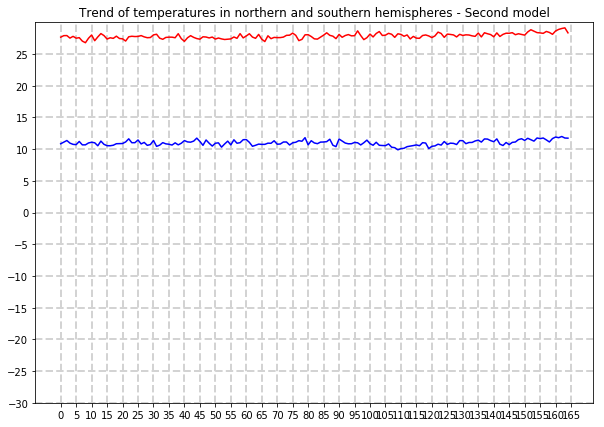

In [58]:
# plot
fig = plt.figure(figsize=(10,7))
plt.plot(bor1, color='blue')
plt.plot(aus1, color='red')
plt.ylim((-10,30))

ax = fig.gca()
plt.title('Trend of temperatures in northern and southern hemispheres - Second model')
ax.set_xticks(np.arange(0, 170, 5))
ax.set_yticks(np.arange(-30, 30, 5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)

Media globale

In [44]:
for i in range(0,360):
    for j in range(-60,60):
        lon_st = i 
        lat_st = j
        glob2 = mts2.sel(lon=lon_st, lat=lat_st, method='nearest')
        glob2=glob2.sel(time=slice("1850-01", "2015-12"))
        
glob2=glob2.coarsen(time=12).mean()

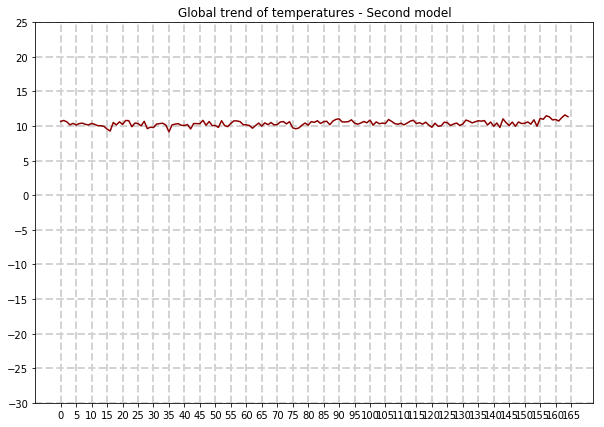

In [59]:
fig = plt.figure(figsize=(10,7))
plt.plot(glob2, color='darkred') 
plt.ylim((-0,20))

ax = fig.gca()
plt.title('Global trend of temperatures - Second model')
ax.set_xticks(np.arange(0, 170, 5))
ax.set_yticks(np.arange(-30, 30, 5))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)

# Trend per le temperature medie globali simulate

Dataset con le medie globali per il primo modello:

In [46]:
from pandas import DataFrame
import statsmodels.api as sm

glob1=np.array(glob1)
l=glob1.tolist(); 
anno=[]
for i in range(1850,2015):
    anno.append(i)


globo1={'temp':l, 'year':anno}
globo1= DataFrame(globo1, columns=['temp','year'])

globo1.head()

,temp,year
0,10.845286,1850
1,11.101906,1851
2,11.355664,1852
3,10.943909,1853
4,10.750661,1854


Costruisco una regressione per individuare il trend della media globale per il primo modello:

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = globo1['year']
Y = globo1['temp']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


x = sm.add_constant(X_train)
results = sm.OLS(Y_train, x).fit()
Y_pred_train = results.predict(x) # eseguiamo la predizione sul train set
Y_pred_test = results.predict(sm.add_constant(X_test))

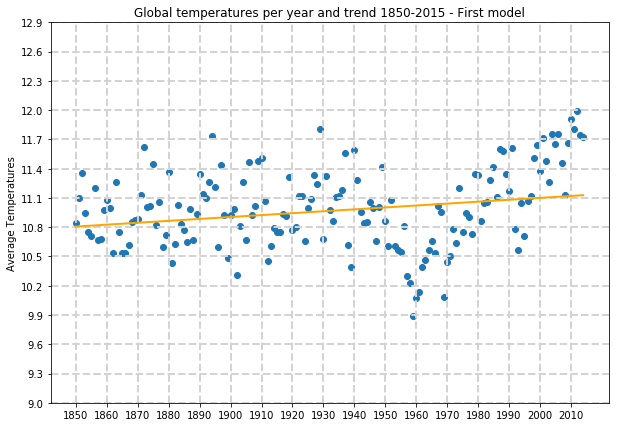

In [48]:
fig=plt.figure(figsize=(10,7))
ax = fig.gca()
plt.title('Global temperatures per year and trend 1850-2015 - First model')
plt.ylabel('Average Temperatures')
plt.scatter(globo1['year'], globo1['temp'])
yhat = results.params.const + results.params.year * X
plt.plot(X, yhat, lw=2, c='orange')

ax.set_xticks(np.arange(1850, 2016, 10))
ax.set_yticks(np.arange(9, 13, 0.3))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.savefig('D1-A.jpg')

Il trend per il primo modello individuato con la regressione ai minimi quadrati evidenzia un lieve e costante incremento delle temperature medie globali simulate per il periodo 1850-2015. Vediamo come si comporta il secondo modello:

In [49]:
from pandas import DataFrame
import statsmodels.api as sm

glob2=np.array(glob2)
l=glob2.tolist(); 
anno=[]
for i in range(1850,2015):
    anno.append(i)


globo2={'temp':l, 'year':anno}
globo2= DataFrame(globo2, columns=['temp','year'])

#globo1.head()

Costruisco una regressione per individuare il trend della media globale per il secondo modello:

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = globo2[['year']]
Y = globo2['temp']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


x = sm.add_constant(X_train)
results = sm.OLS(Y_train, x).fit()
Y_pred_train = results.predict(x) # eseguiamo la predizione sul train set
Y_pred_test = results.predict(sm.add_constant(X_test))

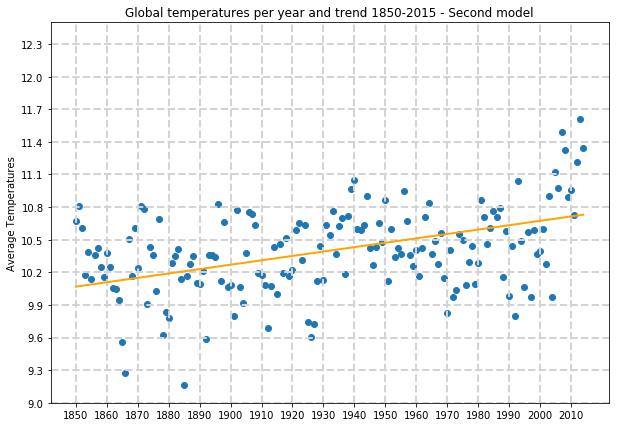

In [51]:
fig=plt.figure(figsize=(10,7))
plt.scatter(globo2['year'], globo2['temp'])

plt.title('Global temperatures per year and trend 1850-2015 - Second model')
plt.ylabel('Average Temperatures')
yhat = results.params.const + results.params.year * X
plt.plot(X, yhat, lw=2, c='orange')
ax = fig.gca()
ax.set_xticks(np.arange(1850, 2016, 10))
ax.set_yticks(np.arange(9, 13, 0.3))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.ylim(9.0,12.5)
plt.savefig('D2-A.jpg')

Il trend globale individuato con la regressione ai minimi quadrati risulta simile a quanto già mostrato nel primo modello, con un lieve e costante incremento delle temperature medie globali simulate per il periodo 1850-2015. 

In [52]:
from pandas import DataFrame
import statsmodels.api as sm

bor1=np.array(bor1)
l=bor1.tolist(); 
aus1=np.array(aus1)
l2=aus1.tolist(); 
bor2=np.array(bor2)
l3=bor2.tolist(); 
aus2=np.array(aus2)
l4=aus2.tolist(); 
anno=[]
for i in range(1850,2015):
    anno.append(i)


medie={'bor1':l, 'aus1':l2, 'bor2':l3, 'aus2':l4, 'year':anno,}
medie= DataFrame(medie, columns=['bor1','aus1','bor2','aus2','year'])

medie.head()

,bor1,aus1,bor2,aus2,year
0,10.845286,27.649178,10.668597,27.057905,1850
1,11.101906,27.893097,10.808052,27.293228,1851
2,11.355664,27.904320,10.605672,27.274446,1852
3,10.943909,27.505915,10.173752,26.938028,1853
4,10.750661,27.784067,10.391187,26.857138,1854


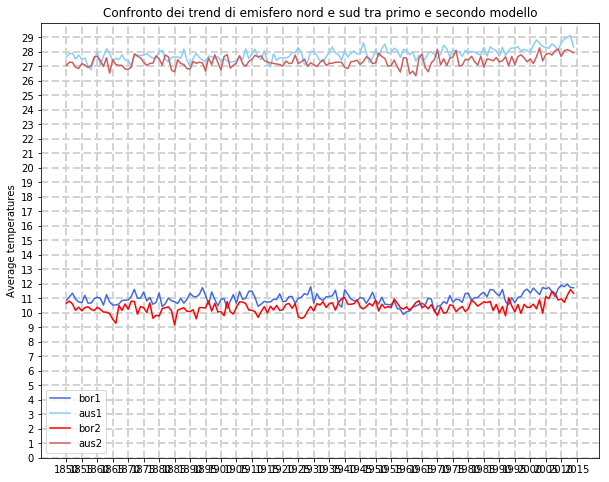

In [53]:
#plt.figure(figsize=(15,9))
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
plt.title('Confronto dei trend di emisfero nord e sud tra primo e secondo modello')
plt.ylabel('year')
plt.ylabel('Average temperatures')
plt.plot(medie['year'],medie['bor1'],color='royalblue')
plt.plot(medie['year'],medie['aus1'],color='lightskyblue')
plt.plot(medie['year'],medie['bor2'],color='red')
plt.plot(medie['year'],medie['aus2'],color='indianred')
plt.legend()
ax.set_xticks(np.arange(1850, 2016, 5))
ax.set_yticks(np.arange(0, 30, 1))
plt.grid(color='lightgrey', linestyle='--', linewidth=2)
plt.ylim(0,30)
plt.savefig('final.jpg')